# Devel
Development of code snippets and for data exploration.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# Imports
import sys
sys.path.append('../..')

import large_image
from histomicstk.saliency.tissue_detection import get_tissue_mask
import matplotlib.pyplot as plt
import numpy as np
from neurotk.yolo import wsi_inference
from ultralytics import YOLO
from neurotk import imread
from os.path import join

### YOLO Inference for NFT Detection
Inference on large WSIs, using annotations as the regions to run on.

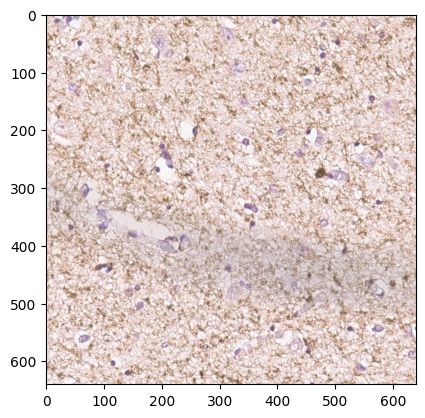

In [5]:
# Parameters: these will be CLI arguments.
lr_res_mag = 0.5
in_file = '/APOLLO_NP/AutopsyImages/2020/E20-122/scanned images/E20-122_1_TAU.svs'
weights = '/jcDataStore/Data/NeuroTK-Dash/models/nft-ai-project-20X-large/weights/best.pt'

ts = large_image.getTileSource(in_file)

x, y = 62082, 64248
tile_size=1280

img = ts.getRegion(
    region=dict(left=x, top=y, right=x + tile_size, bottom=y + tile_size),
    format=large_image.tilesource.TILE_FORMAT_NUMPY,
    scale={'magnification': 20}
)[0][:, :, :3]


from pandas import read_csv

df = read
src_dir = '/jcDataStore/Data/NeuroTK-Dash/nft-detection/tiles/images'
img = imread(join(src_dir, '6381486f7f8a5e686a5d7d89-x28561y11351-x960y2880.png'))

plt.imshow(img)
plt.show()


# model = YOLO(weights)

In [22]:
out = model.predict(img, device='cuda', conf=0.1, imgsz=640)


0: 640x640 (no detections), 94.6ms
Speed: 5.7ms preprocess, 94.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [21]:
out[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))

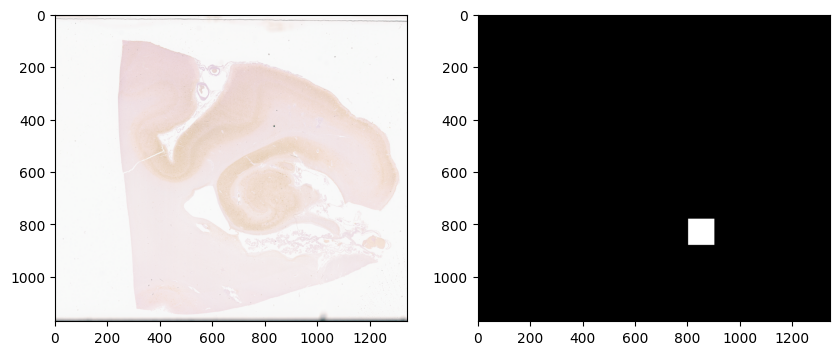

In [61]:
# Create a tissue low resolution mask - this will normally be pulled from DSA
# annotation for testing we will calculate it here.
ts = large_image.getTileSource(in_file)

thumbnail = ts.getRegion(
    format=large_image.tilesource.TILE_FORMAT_NUMPY,
    scale={'magnification': lr_res_mag}
)[0]

thumbnail = thumbnail[:, :, :3]

# Approximate the tissue mask.
mask = get_tissue_mask(thumbnail)[0]
mask = (mask > 0).astype(np.uint8) * 255

mask[:, :] = 0
mask[780:780+100, 800:800+100] = 255

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1, 2, 1)
plt.imshow(thumbnail)
fig.add_subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.show()

In [65]:
# Test out the function.
out = wsi_inference(
    in_file, 
    model, 
    mag=20,
    mask=mask,
    device='0,1',
)

# print(out)


0: 640x640 (no detections), 1: 640x640 (no detections), 2: 640x640 (no detections), 3: 640x640 (no detections), 4: 640x640 (no detections), 5: 640x640 (no detections), 6: 640x640 (no detections), 7: 640x640 (no detections), 8: 640x640 (no detections), 9: 640x640 (no detections), 88.0ms
Speed: 7.0ms preprocess, 8.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


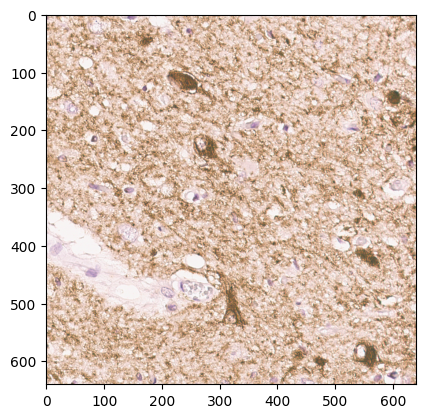

In [45]:
plt.imshow(out[1])